In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("barelydedicated/bank-customer-churn-modeling")

print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████| 262k/262k [00:00<00:00, 294kB/s]

Extracting model files...
Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\barelydedicated\bank-customer-churn-modeling\versions\1


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
file_path = r"C:\Users\HP\.cache\kagglehub\datasets\barelydedicated\bank-customer-churn-modeling\versions\1\Churn_Modelling.csv"


# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [18]:
print(df.columns)


Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')


In [19]:
# One-hot encode 'Geography' and label encode 'Gender'
df = pd.get_dummies(df, columns=['Geography_Germany'], drop_first=True)
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [20]:
# Separate features (X) and target (y)
X = df.drop(columns=['Exited'])
y = df['Exited']

In [21]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#Normalize the Train and Test Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
#Initialize and Build the Neural Network Model
# Initialize the model
model = Sequential()

# Input layer and first hidden layer with dropout
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))

# Second hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
200/200 [==============================] - 4s 10ms/step - loss: 0.5036 - accuracy: 0.7831 - val_loss: 0.4264 - val_accuracy: 0.8125
Epoch 2/50
200/200 [==============================] - 1s 6ms/step - loss: 0.4487 - accuracy: 0.8055 - val_loss: 0.4052 - val_accuracy: 0.8319
Epoch 3/50
200/200 [==============================] - 1s 6ms/step - loss: 0.4264 - accuracy: 0.8188 - val_loss: 0.3877 - val_accuracy: 0.8419
Epoch 4/50
200/200 [==============================] - 1s 6ms/step - loss: 0.4112 - accuracy: 0.8261 - val_loss: 0.3751 - val_accuracy: 0.8413
Epoch 5/50
200/200 [==============================] - 1s 6ms/step - loss: 0.3966 - accuracy: 0.8380 - val_loss: 0.3706 - val_accuracy: 0.8487
Epoch 6/50
200/200 [==============================] - 1s 6ms/step - loss: 0.3827 - accuracy: 0.8427 - val_loss: 0.3587 - val_accuracy: 0.8500
Epoch 7/50
200/200 [==============================] - 1s 6ms/step - loss: 0.3782 - accuracy: 0.8467 - val_loss: 0.3574 - val_accuracy: 0.8519
Epoch

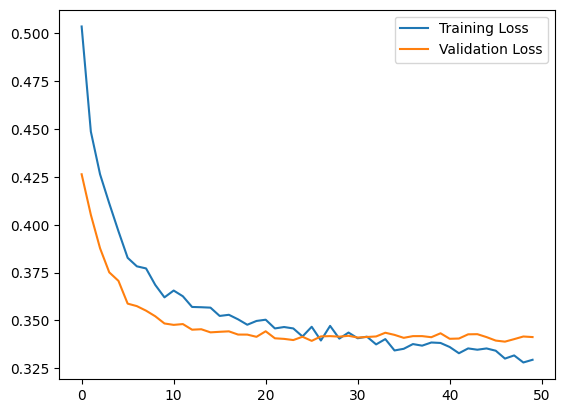

In [26]:
#Train the Model and Identify Points for Improvement

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Plot training and validation loss (optional, for analysis)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [27]:
#Evaluate Model Performance

# Predict on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


63/63 [==============================] - 1s 4ms/step
Accuracy: 0.8595
Confusion Matrix:
 [[1543   64]
 [ 217  176]]
